**IMPORTING DATA**

In [ ]:
import pandas as pd
file_path="/content/SPAM text message 20170820 - Data - SPAM text message 20170820 - Data.csv"
data=pd.read_csv(file_path)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**DATA NORMALIZATION**

In [17]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
label_encoder = LabelEncoder()
stopwords_set = set(stopwords.words('english'))

def preprocess_text(text):
  text=text.lower()
  text=re.sub(r"https\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
  text=re.sub(r"[^\w\s]", "",text)
  tokens=word_tokenize(text)
  tokens=[lemmatizer.lemmatize(stemmer.stem(word))for word in tokens if word]
  return " ".join(tokens)

data['Message']=data['Message'].apply(preprocess_text)
data['Category']=label_encoder.fit_transform(data['Category'])

In [12]:
data.head()

,Category,Message
0,ham,go until jurong point crazi avail onli in bugi...
1,ham,ok lar joke wif u oni
2,spam,free entri in 2 a wkli comp to win fa cup fina...
3,ham,u dun say so earli hor u c alreadi then say
4,ham,nah i dont think he goe to usf he live around ...


**LABEL ENCODER**

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])

**SPLITTING OF DATA**

In [22]:
pip install scikit-learn


In [26]:
from sklearn.model_selection import train_test_split
x=data['Message']
y=data['Category']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)




**MODELS**

**lOGISTIC REGRESSION**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train_vect, y_train)
y_pred = model.predict(x_test_vect)
accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred, average='binary')
recall_log_reg = recall_score(y_test, y_pred, average='binary')
f1_log_reg = f1_score(y_test, y_pred, average='binary')
roc_auc_log_reg = roc_auc_score(y_test, model.predict_proba(x_test_vect)[:, 1])

**RESULT**

In [33]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1 Score:", f1_log_reg)
print("ROC AUC:", roc_auc_log_reg)


Logistic Regression Performance:
Accuracy: 0.9605381165919282
Precision: 1.0
Recall: 0.7046979865771812
F1 Score: 0.8267716535433071
ROC AUC: 0.9870774104798032


**NAIVE BAYES**

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train_vect, y_train)
y_pred_nb = nb_model.predict(x_test_vect)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='binary')
recall_nb = recall_score(y_test, y_pred_nb, average='binary')
f1_nb = f1_score(y_test, y_pred_nb, average='binary')
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(x_test_vect)[:, 1])


**RESULTS**

In [35]:
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"ROC AUC: {roc_auc_nb:.4f}")


Naive Bayes Performance:
Accuracy: 0.9444
Precision: 1.0000
Recall: 0.5839
F1 Score: 0.7373
ROC AUC: 0.9667


**SUPPORT VECTOR MACHINE**

In [36]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(x_train_vect, y_train)
y_pred_svm = svm_model.predict(x_test_vect)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(x_test_vect)[:, 1])

**RESULTS**

In [37]:
print("SVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC AUC: {roc_auc_svm:.4f}")


SVM Performance:
Accuracy: 0.9821
Precision: 1.0000
Recall: 0.8658
F1 Score: 0.9281
ROC AUC: 0.9897


**RANDOM FOREST**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_vect, y_train)
y_pred_rf = rf_model.predict(x_test_vect)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test_vect)[:, 1])


**RESULTS**

In [39]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")


Random Forest Performance:
Accuracy: 0.9713
Precision: 1.0000
Recall: 0.7852
F1 Score: 0.8797
ROC AUC: 0.9928


**ANALYSIS OF DIFFERENT MODELS PERFORMANCE**

In [40]:
results = pd.DataFrame({
 'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest'],
 'Accuracy': [accuracy_log_reg, accuracy_nb, accuracy_svm, accuracy_rf],
 'Precision': [precision_log_reg, precision_nb, precision_svm, precision_rf],
 'Recall': [recall_log_reg, recall_nb, recall_svm, recall_rf],
 'F1 Score': [f1_log_reg, f1_nb, f1_svm, f1_rf],
 'ROC AUC': [roc_auc_log_reg, roc_auc_nb, roc_auc_svm, roc_auc_rf]
})
print(results)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.960538        1.0  0.704698  0.826772  0.987077
1          Naive Bayes  0.944395        1.0  0.583893  0.737288  0.966679
2                  SVM  0.982063        1.0  0.865772  0.928058  0.989655
3        Random Forest  0.971300        1.0  0.785235  0.879699  0.992781


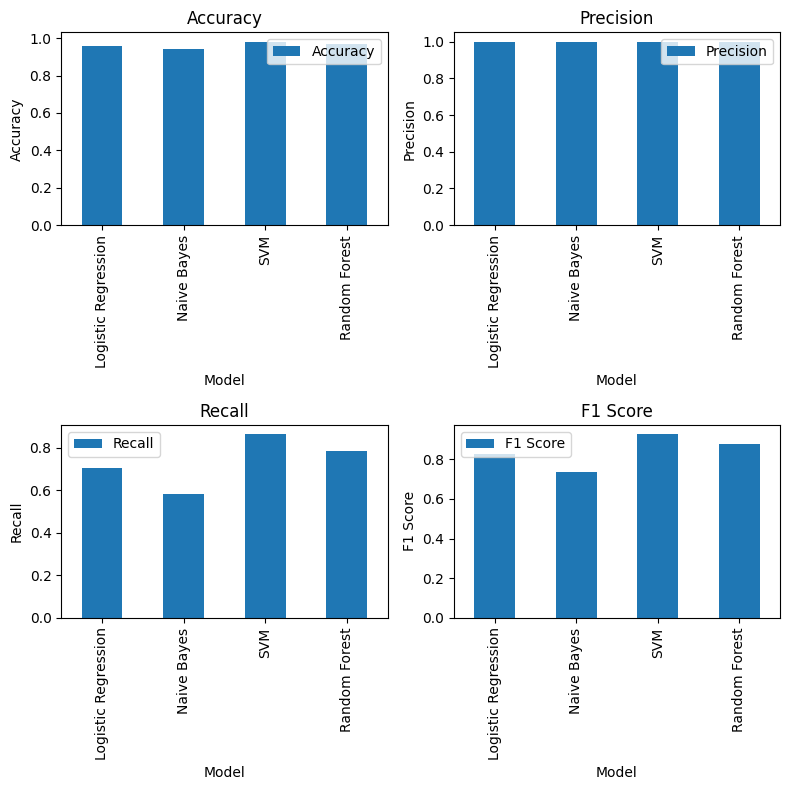

<Figure size 400x400 with 0 Axes>

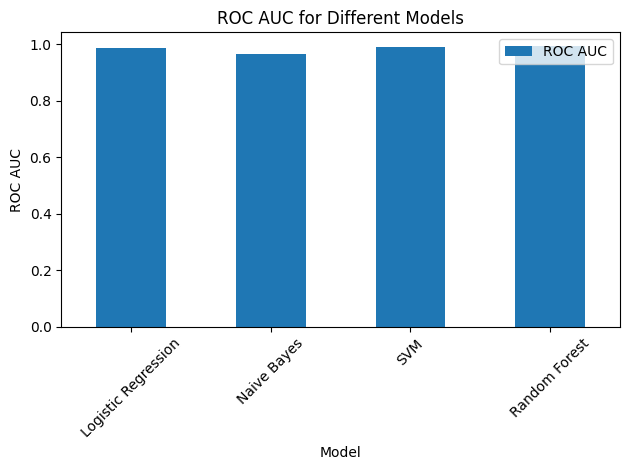

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
results.plot(kind='bar', x='Model', y='Accuracy', ax=plt.gca())
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
results.plot(kind='bar', x='Model', y='Precision', ax=plt.gca())
plt.title('Precision')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
results.plot(kind='bar', x='Model', y='Recall', ax=plt.gca())
plt.title('Recall')
plt.ylabel('Recall')
plt.subplot(2, 2, 4)

results.plot(kind='bar', x='Model', y='F1 Score', ax=plt.gca())
plt.title('F1 Score')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()
plt.figure(figsize=(4, 4))
results.plot(kind='bar', x='Model', y='ROC AUC')
plt.title('ROC AUC for Different Models')
plt.ylabel('ROC AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**FINDINGS SUMMARIZATION**

**INTRODUCTION**


In this analysis, four machine learning models were assessed for their effectiveness in detecting spam in SMS messages: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), and Random Forest. The objective was to identify the best-performing model using different performance metrics

**MODEL PERFORMANCE**

In [44]:
print(results)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.960538        1.0  0.704698  0.826772  0.987077
1          Naive Bayes  0.944395        1.0  0.583893  0.737288  0.966679
2                  SVM  0.982063        1.0  0.865772  0.928058  0.989655
3        Random Forest  0.971300        1.0  0.785235  0.879699  0.992781





**Model Performance Summary for Spam Detection**

**Best Performing Model:**

The SVM model excels with an Accuracy of 0.9821, Recall of 0.8658, and F1 Score of 0.9281, making it the most effective choice for spam detection.

**Logistic Regression:**

Achieving Accuracy of 0.9605 and Precision of 1.0, it has a Recall of 0.7047 and an F1 Score of 0.8268, indicating good precision but lower sensitivity to actual spam messages.

**Naive Bayes:**

With an Accuracy of 0.9444 and Precision of 1.0, its Recall is 0.5839, resulting in an F1 Score of 0.7373, reflecting high precision but limited spam detection capability.

**Random Forest:**

This model shows an Accuracy of 0.9713, Recall of 0.7852, and F1 Score of 0.8797, demonstrating strong performance, though slightly less effective than SVM.